<a href="https://colab.research.google.com/github/kabulezhoushen/blender-mcp/blob/main/%E6%B3%A2%E5%8A%A8%E7%8E%87%E4%BA%A4%E6%98%935.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

小鹏汽车(9868.HK)


买卖信号：

连续两天波动率>平均波动率（近三个月平均波动率）

MA_short - MA_long > 0时买入

MA_short - MA_long < 0时卖出


结果分析：

评估每种MA组合的表现(累计收益、最大回撤、胜率)

输出表现最好的前10个组合

附：

每日波动率：（(最高价-最低价)/开盘价）

遍历7种不同周期的移动平均线（5,10,14,22,65,161,252日）

[*********************100%***********************]  1 of 1 completed


近3个月平均波动率: 0.0494

最近10个交易日的信号:
Price           Close Daily_Volatility Signal
Ticker        9868.HK                        
Date                                         
2025-06-18  73.849998         0.025850      0
2025-06-19  71.750000         0.040000      0
2025-06-20  72.449997         0.021528      0
2025-06-23  74.349998         0.065585      0
2025-06-24  76.699997         0.031126      0
2025-06-25  76.449997         0.022092      0
2025-06-26  74.150002         0.045635      0
2025-06-27  71.800003         0.037115      0
2025-06-30  70.599998         0.025766      0
2025-07-02  72.150002         0.024306      0


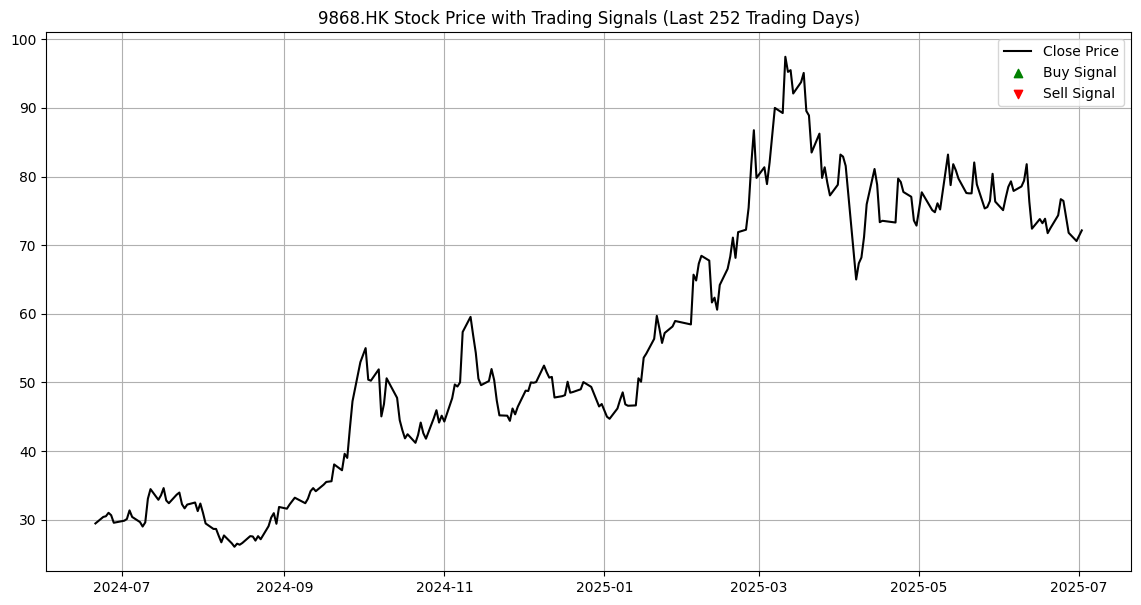

[*********************100%***********************]  1 of 1 completed


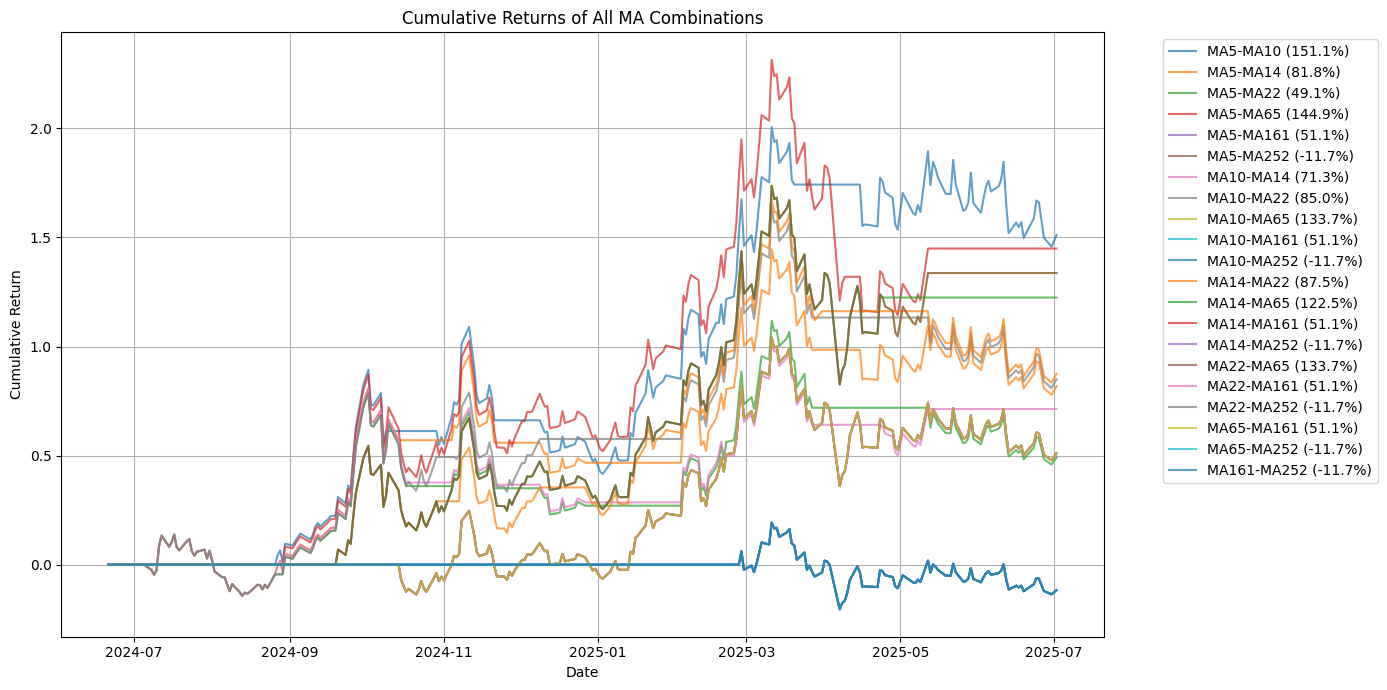


最佳MA组合: MA5和MA10
总收益率: 151.12%


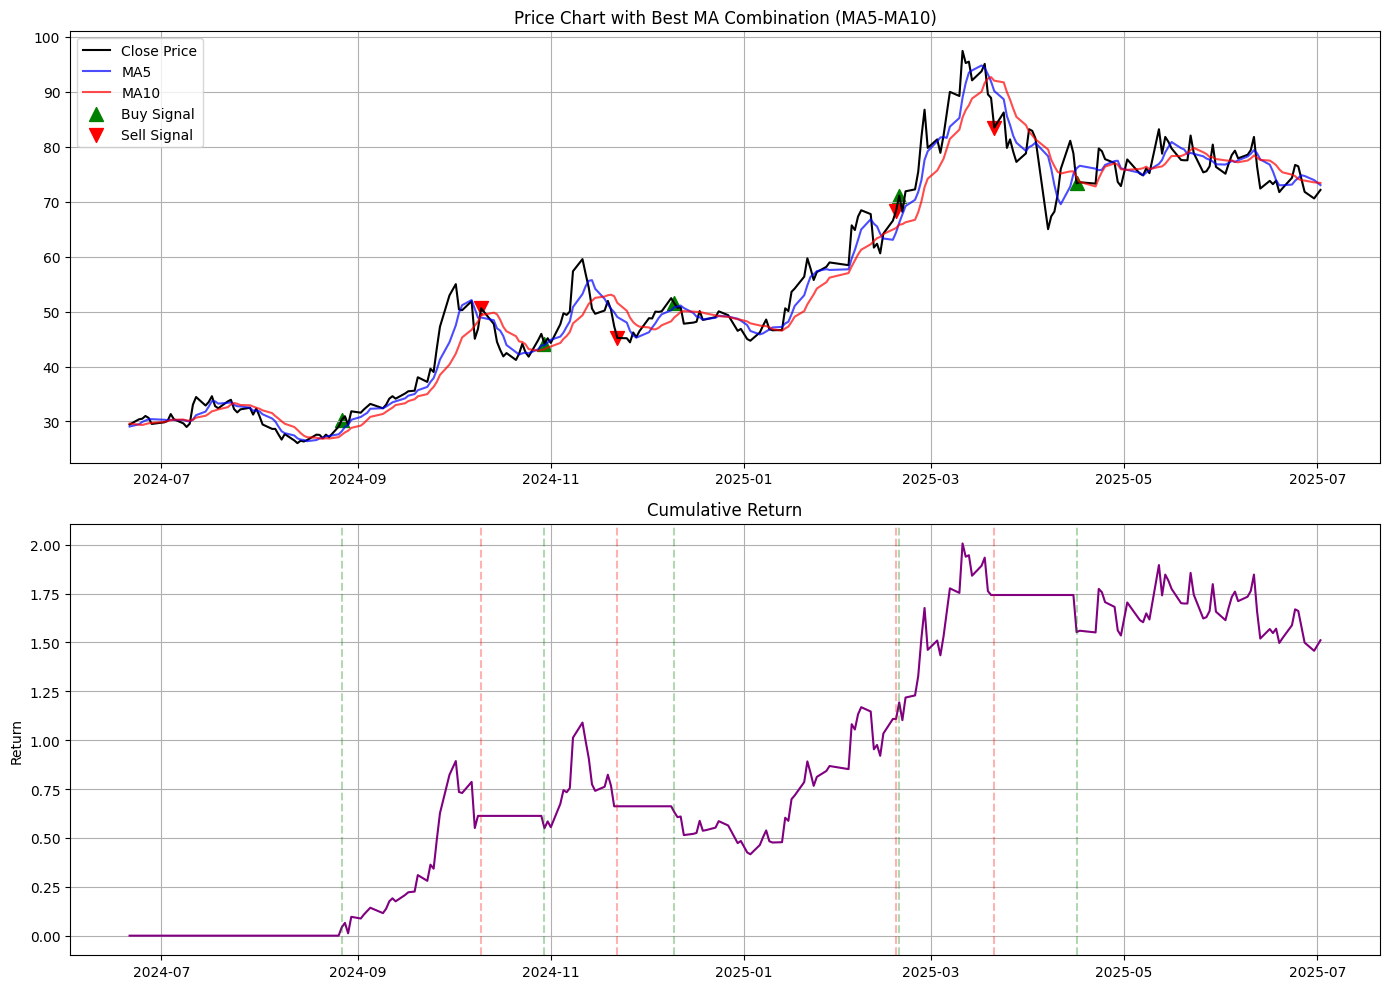


交易信号详情:
           0 Signal      Price
0 2024-08-27    Buy  30.299999
0 2024-10-10   Sell  50.599998
1 2024-10-30    Buy  44.150002
1 2024-11-22   Sell  45.200001
2 2024-12-10    Buy  51.500000
2 2025-02-18   Sell  68.349998
3 2025-02-19    Buy  71.099998
3 2025-03-21   Sell  83.500000
4 2025-04-16    Buy  73.349998


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 1. 下载小鹏汽车港股(9868.HK)数据
ticker = "9868.HK"
end_date = datetime.now()
start_date = end_date - timedelta(days=500)  # 多下载一些数据确保有252个交易日

data = yf.download(ticker, start=start_date, end=end_date)

# 2. 计算每日波动率(当日最高价-当日最低价)/当日开盘价
data['Daily_Volatility'] = (data['High'] - data['Low']) / data['Open']

# 3. 计算近3个月(约63个交易日)的平均波动率
avg_volatility_3m = data['Daily_Volatility'].rolling(window=63).mean().iloc[-1]

# 4. 计算不同周期的移动平均线
ma_periods = [5, 10, 14, 22, 65, 161, 252]
for period in ma_periods:
    data[f'MA_{period}'] = data['Close'].rolling(window=period).mean()

# 5. 初始化交易信号列
data['Signal'] = 0  # 0表示无信号，1表示买入，-1表示卖出

# 6. 生成交易信号
for i in range(2, len(data)):
    # 检查连续两天波动率大于3个月平均
    if (data['Daily_Volatility'].iloc[i-1] > avg_volatility_3m and
        data['Daily_Volatility'].iloc[i] > avg_volatility_3m):

        # 遍历所有MA组合
        for short_idx, short_ma in enumerate(ma_periods[:-1]):
            for long_ma in ma_periods[short_idx+1:]:
                short_col = f'MA_{short_ma}'
                long_col = f'MA_{long_ma}'

                # 检查MA交叉
                if data[short_col].iloc[i] > data[long_col].iloc[i] and data[short_col].iloc[i-1] <= data[long_col].iloc[i-1]:
                    data['Signal'].iloc[i] = 1  # 买入信号
                elif data[short_col].iloc[i] < data[long_col].iloc[i] and data[short_col].iloc[i-1] >= data[long_col].iloc[i-1]:
                    data['Signal'].iloc[i] = -1  # 卖出信号

# 7. 筛选最近252个交易日的数据
final_data = data.iloc[-252:]

# 8. 打印结果
print(f"近3个月平均波动率: {avg_volatility_3m:.4f}")
print("\n最近10个交易日的信号:")
print(final_data[['Close', 'Daily_Volatility', 'Signal']].tail(10))

# 9. 可视化最近252个交易日的数据
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(final_data.index, final_data['Close'], label='Close Price', color='black')

# 标记买卖信号
buy_signals = final_data[final_data['Signal'] == 1]
sell_signals = final_data[final_data['Signal'] == -1]
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', label='Buy Signal')
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', label='Sell Signal')

plt.title(f'{ticker} Stock Price with Trading Signals (Last 252 Trading Days)')
plt.legend()
plt.grid()
plt.show()


import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# 1. 下载小鹏汽车港股(9868.HK)数据
ticker = "9868.HK"
end_date = datetime.now()
start_date = end_date - timedelta(days=500)  # 多下载一些数据确保有252个交易日

data = yf.download(ticker, start=start_date, end=end_date)

# 2. 计算每日波动率(当日最高价-当日最低价)/当日开盘价
data['Daily_Volatility'] = (data['High'] - data['Low']) / data['Open']

# 3. 计算近3个月(约63个交易日)的平均波动率
avg_volatility_3m = data['Daily_Volatility'].rolling(window=63).mean().iloc[-1]

# 4. 计算不同周期的移动平均线
ma_periods = [5, 10, 14, 22, 65, 161, 252]
for period in ma_periods:
    data[f'MA_{period}'] = data['Close'].rolling(window=period).mean()

# 5. 筛选最近252个交易日的数据
final_data = data.iloc[-252:].copy()

# 6. 生成所有可能的MA组合
ma_combinations = []
for i, short_ma in enumerate(ma_periods[:-1]):
    for long_ma in ma_periods[i+1:]:
        ma_combinations.append((short_ma, long_ma))

# 7. 计算每个组合的收益率
plt.figure(figsize=(14, 7))
best_return = -np.inf
best_combination = None
best_returns = None
best_signals = None

for short_ma, long_ma in ma_combinations:
    # 初始化
    returns = pd.Series(0, index=final_data.index)
    position = 0  # 0表示空仓，1表示持仓
    signals = pd.Series(0, index=final_data.index)

    short_col = f'MA_{short_ma}'
    long_col = f'MA_{long_ma}'

    for i in range(1, len(final_data)):
        # 检查连续两天波动率大于3个月平均
        if (final_data['Daily_Volatility'].iloc[i-1] > avg_volatility_3m and
            final_data['Daily_Volatility'].iloc[i] > avg_volatility_3m):

            # 检查MA交叉
            if final_data[short_col].iloc[i] > final_data[long_col].iloc[i] and position == 0:
                position = 1
                signals.iloc[i] = 1  # 买入信号
            elif final_data[short_col].iloc[i] < final_data[long_col].iloc[i] and position == 1:
                position = 0
                signals.iloc[i] = -1  # 卖出信号

        # 计算每日收益率
        if position == 1:
            returns.iloc[i] = (final_data['Close'].iloc[i] - final_data['Close'].iloc[i-1]) / final_data['Close'].iloc[i-1]

    # 计算累计收益率
    cumulative_returns = (1 + returns).cumprod() - 1
    total_return = cumulative_returns.iloc[-1]

    # 绘制收益率曲线
    plt.plot(cumulative_returns.index, cumulative_returns, label=f'MA{short_ma}-MA{long_ma} ({total_return:.1%})', alpha=0.7)

    # 检查是否为最佳组合
    if total_return > best_return:
        best_return = total_return
        best_combination = (short_ma, long_ma)
        best_returns = cumulative_returns
        best_signals = signals

# 8. 绘制所有组合的收益率曲线
plt.title('Cumulative Returns of All MA Combinations')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# 9. 绘制最佳组合的详细情况
if best_combination:
    short_ma, long_ma = best_combination
    print(f"\n最佳MA组合: MA{short_ma}和MA{long_ma}")
    print(f"总收益率: {best_return:.2%}")

    plt.figure(figsize=(14, 10))

    # 价格和MA曲线
    ax1 = plt.subplot(2, 1, 1)
    ax1.plot(final_data.index, final_data['Close'], label='Close Price', color='black')
    ax1.plot(final_data.index, final_data[f'MA_{short_ma}'], label=f'MA{short_ma}', color='blue', alpha=0.7)
    ax1.plot(final_data.index, final_data[f'MA_{long_ma}'], label=f'MA{long_ma}', color='red', alpha=0.7)

    # 标记买卖信号
    buy_signals = final_data.index[best_signals == 1]
    sell_signals = final_data.index[best_signals == -1]
    ax1.scatter(buy_signals, final_data.loc[buy_signals, 'Close'],
                marker='^', color='g', s=100, label='Buy Signal')
    ax1.scatter(sell_signals, final_data.loc[sell_signals, 'Close'],
                marker='v', color='r', s=100, label='Sell Signal')

    ax1.set_title(f'Price Chart with Best MA Combination (MA{short_ma}-MA{long_ma})')
    ax1.legend()
    ax1.grid()

    # 收益率曲线
    ax2 = plt.subplot(2, 1, 2)
    ax2.plot(best_returns.index, best_returns, label='Cumulative Return', color='purple')
    ax2.set_title('Cumulative Return')
    ax2.set_ylabel('Return')
    ax2.grid()

    # 标记买卖信号在收益率图上
    for date in buy_signals:
        ax2.axvline(x=date, color='g', linestyle='--', alpha=0.3)
    for date in sell_signals:
        ax2.axvline(x=date, color='r', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 输出交易信号详情
    print("\n交易信号详情:")
    signal_dates = pd.concat([
        pd.Series(buy_signals, name='Buy Date'),
        pd.Series(sell_signals, name='Sell Date')
    ]).sort_values().to_frame()
    signal_dates['Signal'] = ['Buy' if d in buy_signals else 'Sell' for d in signal_dates.iloc[:, 0]]
    signal_dates['Price'] = final_data.loc[signal_dates.iloc[:, 0], 'Close'].values
    print(signal_dates)
else:
    print("没有找到符合条件的交易信号")

对于股票池中103支股票做波动率交易

测试所有可能的MA组合（短MA vs 长MA）

显示总收益率最高的10只股票

可视化表现最好的3只股票的详细情况（所有MA组合的收益率曲线对比，最佳MA组合的价格走势和买卖信号，累计收益率曲线）



Processing 1/103: 3933.HK...
Processing 2/103: 3692.HK...
Processing 3/103: 0512.HK...
Processing 4/103: 2359.HK...
Processing 5/103: 0241.HK...
Processing 6/103: 6618.HK...
Processing 7/103: 6821.HK...
Processing 8/103: 0867.HK...
Processing 9/103: 1066.HK...
Processing 10/103: 3759.HK...
Processing 11/103: 1093.HK...
Processing 12/103: 1061.HK...
Processing 13/103: 2269.HK...
Processing 14/103: 1530.HK...
Processing 15/103: 2268.HK...
Processing 16/103: 3347.HK...
Processing 17/103: 2172.HK...
Processing 18/103: 1873.HK...
Processing 19/103: 1858.HK...
Processing 20/103: 1810.HK...
Processing 21/103: 3396.HK...
Processing 22/103: 0285.HK...
Processing 23/103: 9698.HK...
Processing 24/103: 0856.HK...
Processing 25/103: 3888.HK...
Processing 26/103: 6088.HK...
Processing 27/103: 6869.HK...
Processing 28/103: 1263.HK...
Processing 29/103: 2400.HK...
Processing 30/103: 0354.HK...
Processing 31/103: 0434.HK...
Processing 32/103: 1675.HK...
Processing 33/103: 1686.HK...
Processing 34/103: 

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

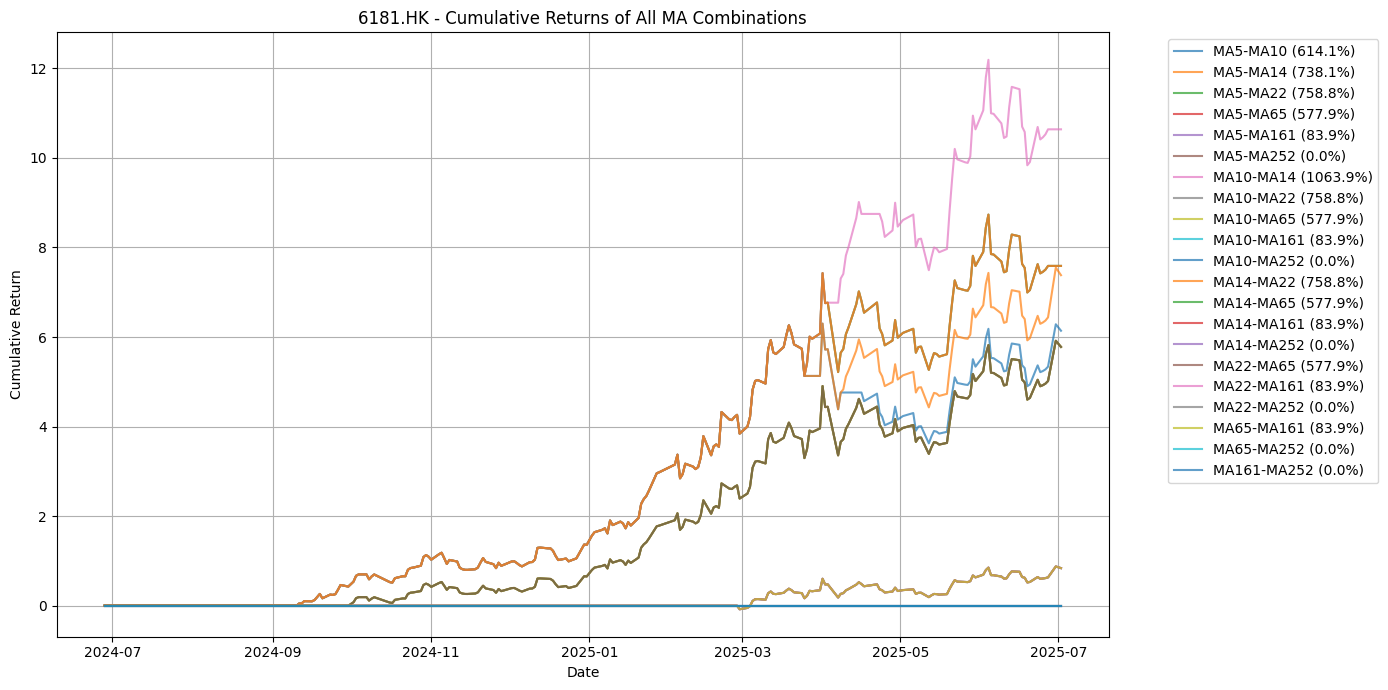

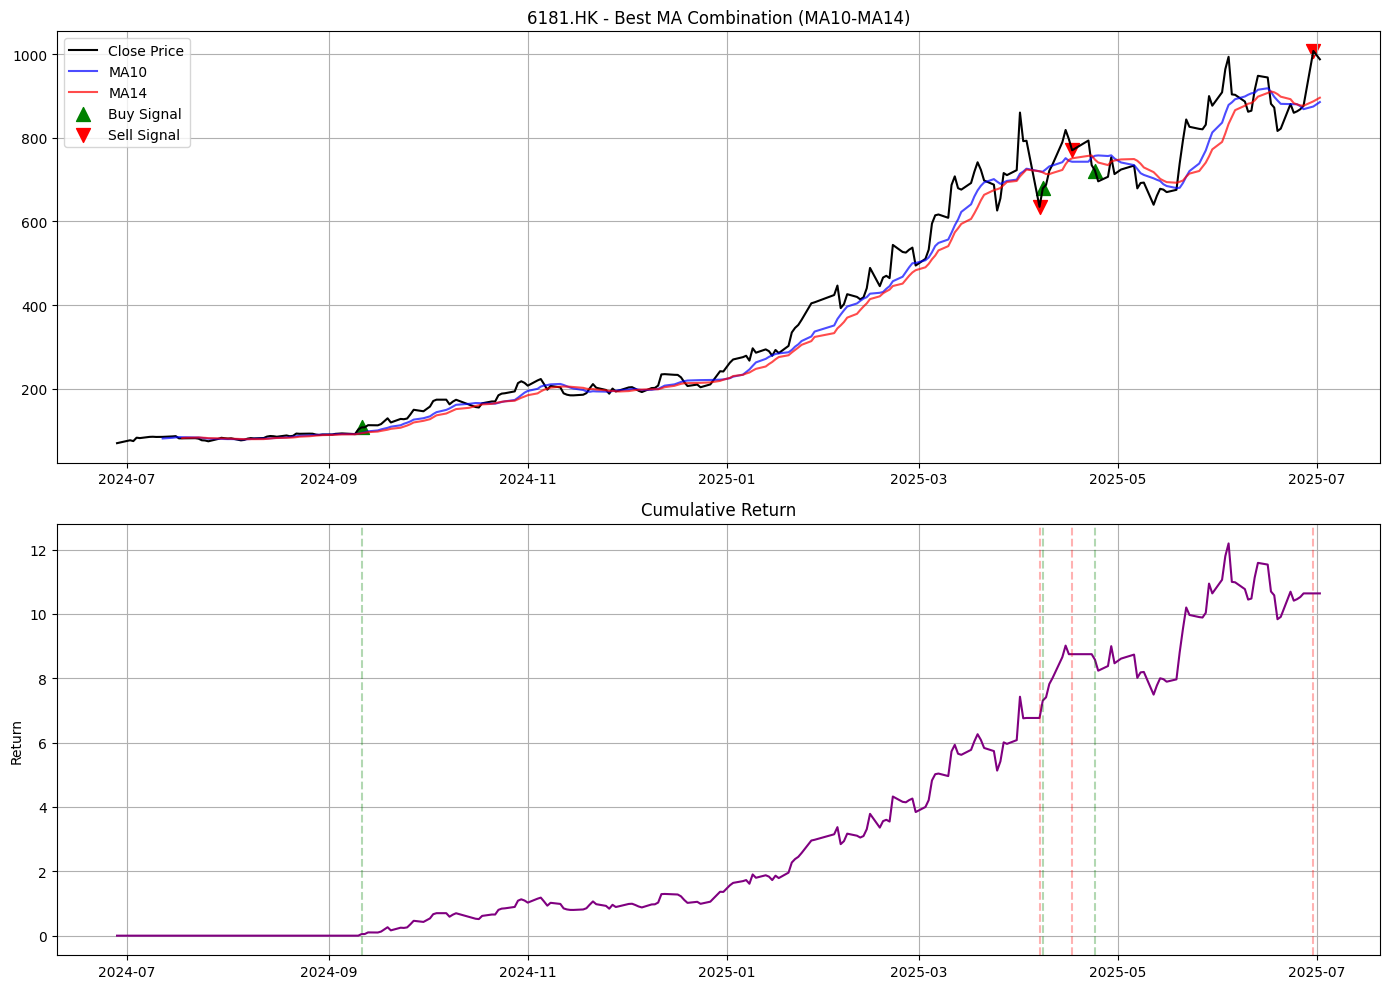

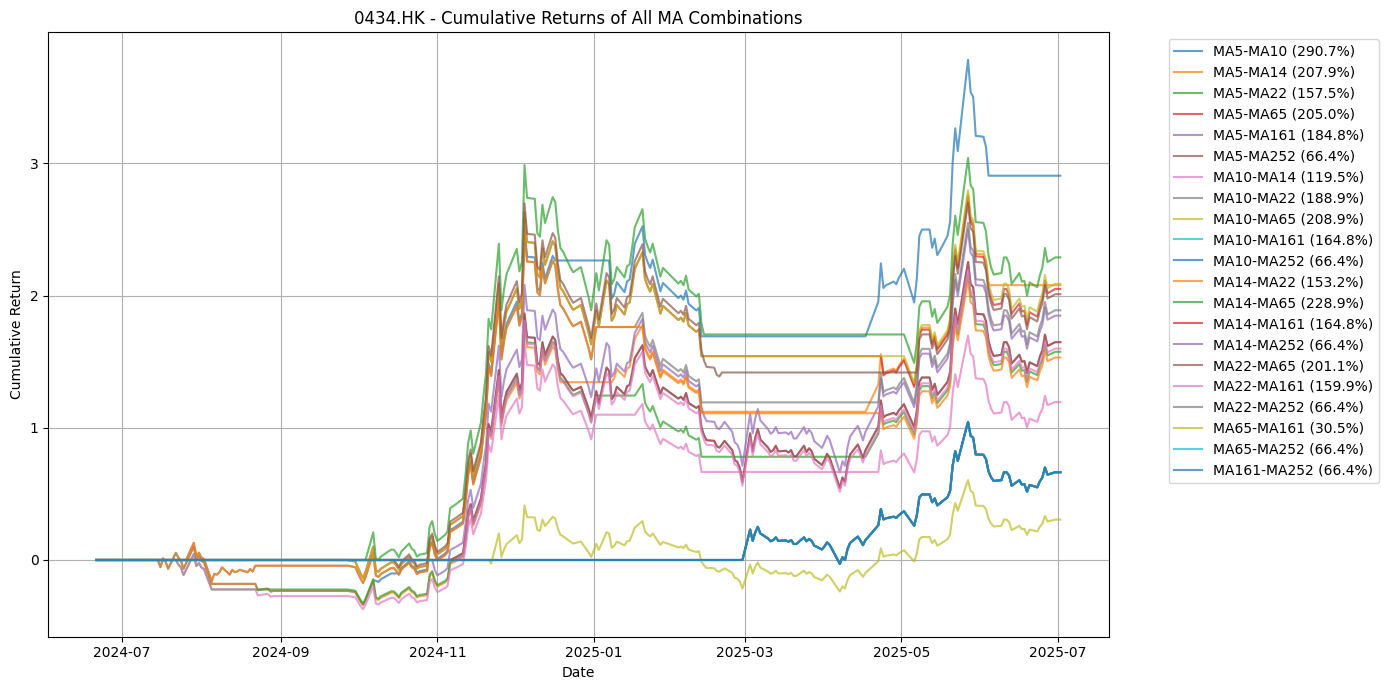

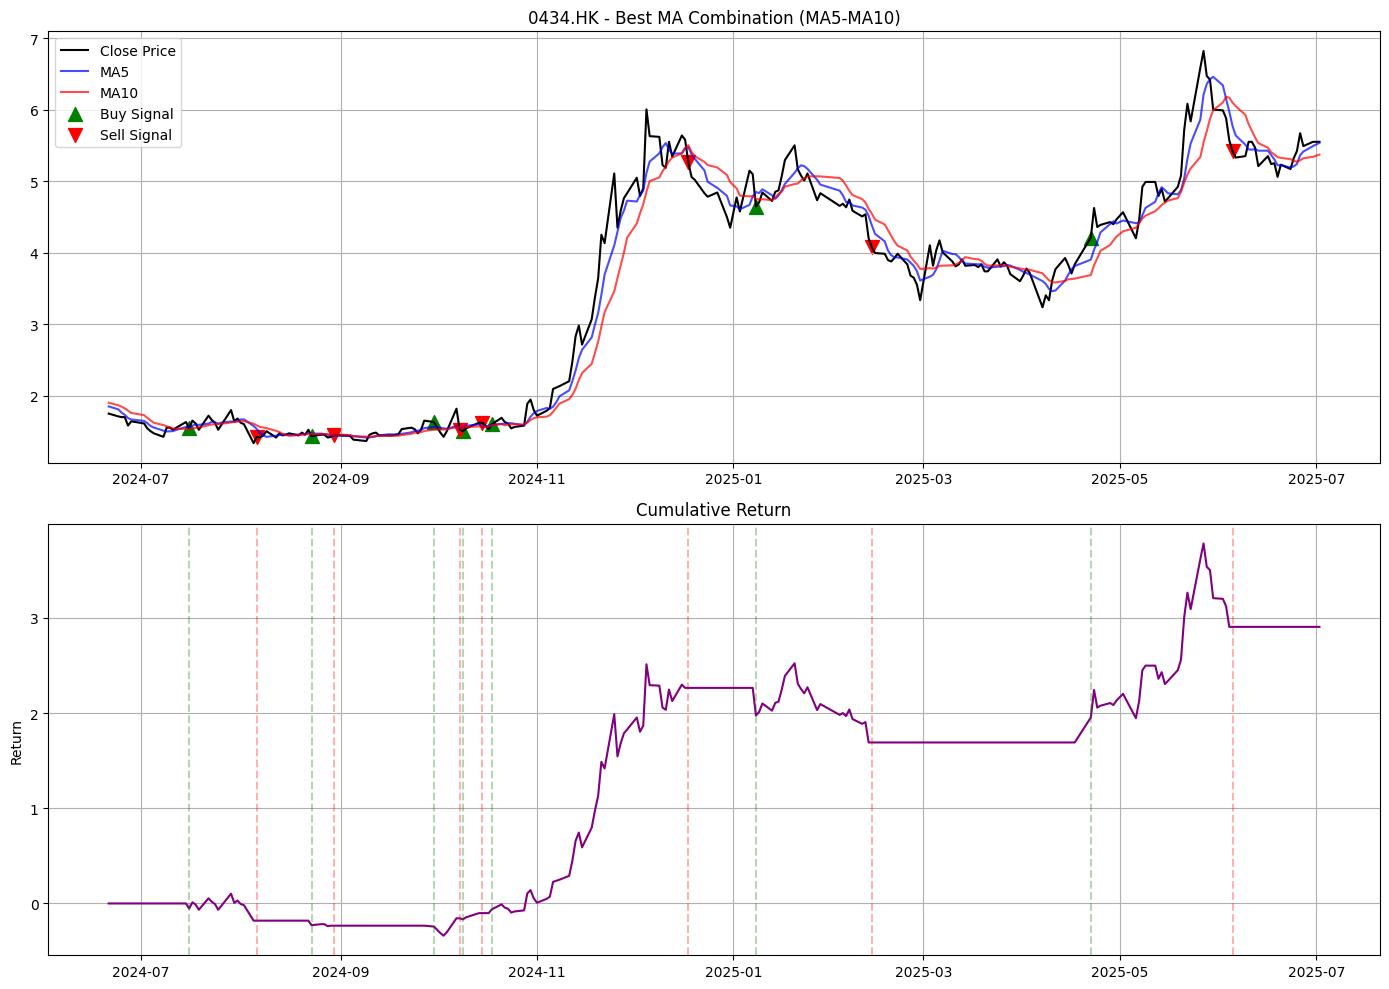

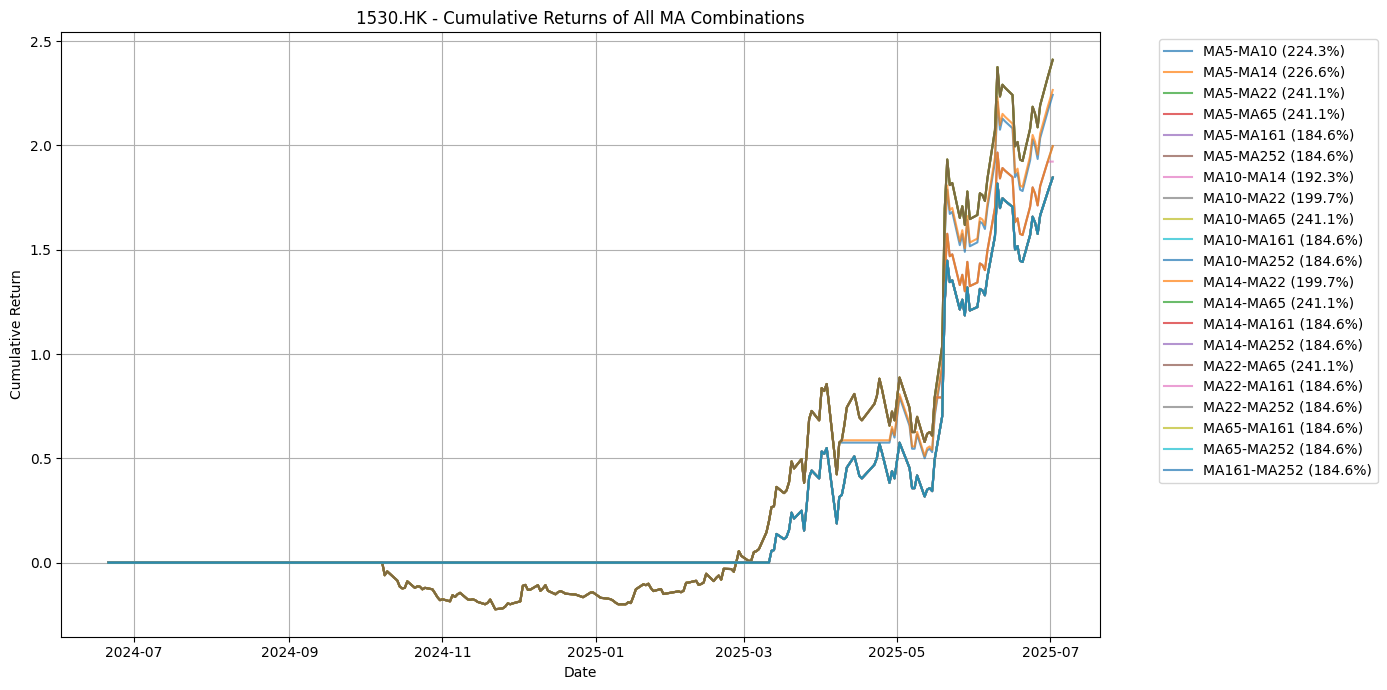

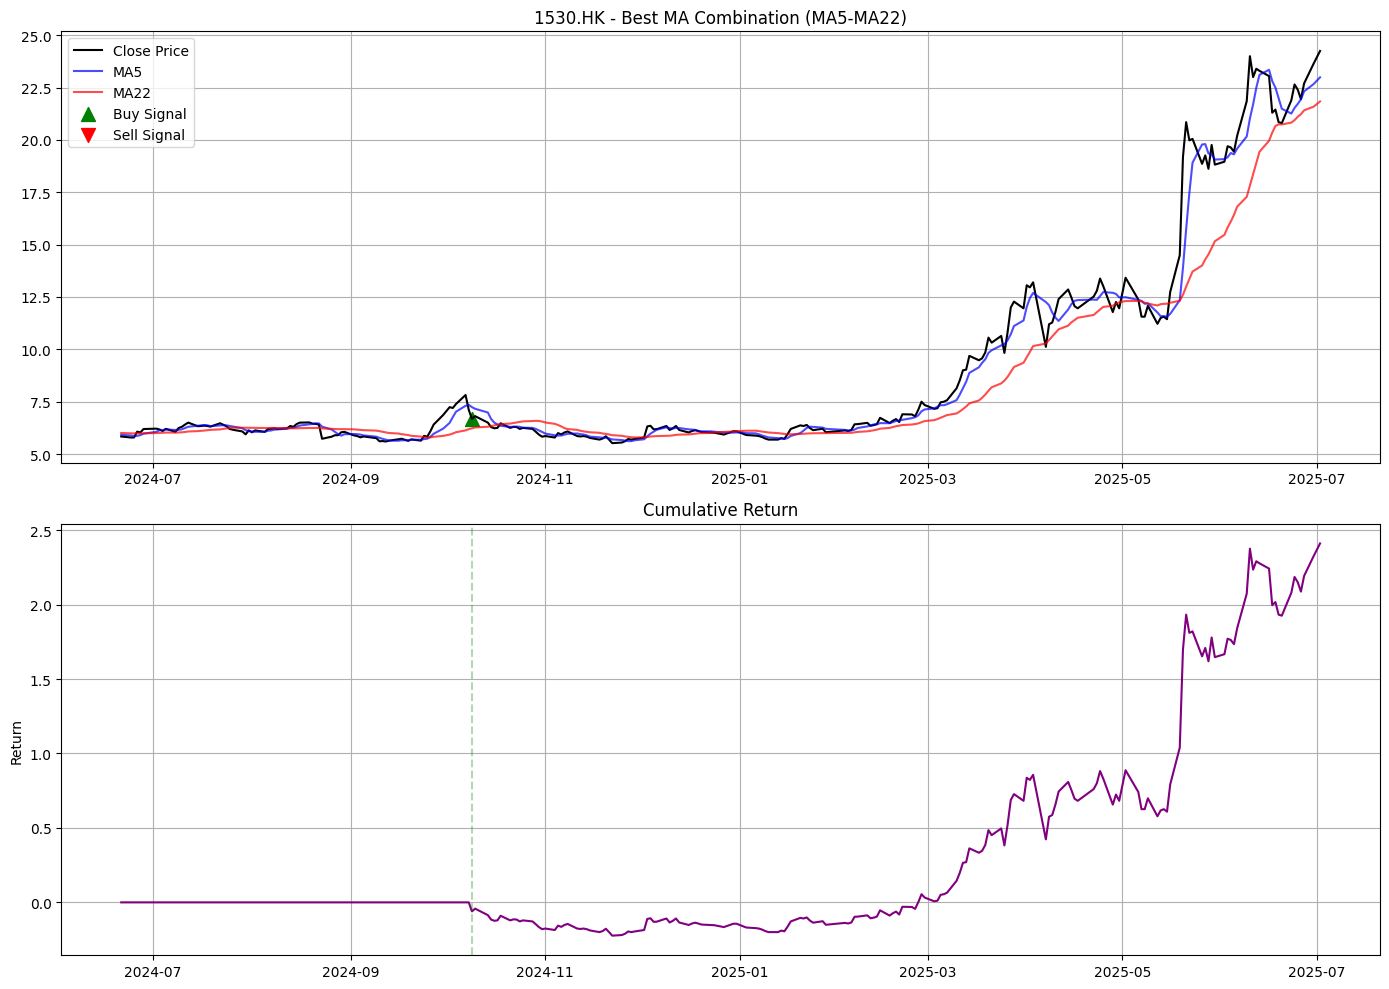

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 读取目标股票列表
stocks_df = pd.read_csv('target_stocks.csv')
stock_codes = stocks_df['Code'].tolist()

# 定义分析函数
def analyze_stock(ticker, show_plots=False):
    try:
        # 1. 下载数据
        end_date = datetime.now()
        start_date = end_date - timedelta(days=500)  # 确保有足够数据
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)

        if data.empty:
            return None

        # 2. 计算每日波动率
        data['Daily_Volatility'] = (data['High'] - data['Low']) / data['Open']

        # 3. 计算近3个月平均波动率
        avg_volatility_3m = data['Daily_Volatility'].rolling(window=63).mean().iloc[-1]

        # 4. 计算移动平均线
        ma_periods = [5, 10, 14, 22, 65, 161, 252]
        for period in ma_periods:
            data[f'MA_{period}'] = data['Close'].rolling(window=period).mean()

        # 5. 筛选最近252个交易日
        final_data = data.iloc[-252:].copy()

        # 6. 生成所有MA组合
        ma_combinations = []
        for i, short_ma in enumerate(ma_periods[:-1]):
            for long_ma in ma_periods[i+1:]:
                ma_combinations.append((short_ma, long_ma))

        # 7. 计算每个组合的收益率
        best_return = -np.inf
        best_combination = None
        best_returns = None
        best_signals = None

        plt.figure(figsize=(14, 7))

        for short_ma, long_ma in ma_combinations:
            returns = pd.Series(0, index=final_data.index)
            position = 0
            signals = pd.Series(0, index=final_data.index)

            short_col = f'MA_{short_ma}'
            long_col = f'MA_{long_ma}'

            for i in range(1, len(final_data)):
                if (final_data['Daily_Volatility'].iloc[i-1] > avg_volatility_3m and
                    final_data['Daily_Volatility'].iloc[i] > avg_volatility_3m):

                    if final_data[short_col].iloc[i] > final_data[long_col].iloc[i] and position == 0:
                        position = 1
                        signals.iloc[i] = 1
                    elif final_data[short_col].iloc[i] < final_data[long_col].iloc[i] and position == 1:
                        position = 0
                        signals.iloc[i] = -1

                if position == 1:
                    returns.iloc[i] = final_data['Close'].pct_change().iloc[i]

            cumulative_returns = (1 + returns).cumprod() - 1
            total_return = cumulative_returns.iloc[-1]

            if show_plots:
                plt.plot(cumulative_returns.index, cumulative_returns,
                        label=f'MA{short_ma}-MA{long_ma} ({total_return:.1%})', alpha=0.7)

            if total_return > best_return:
                best_return = total_return
                best_combination = (short_ma, long_ma)
                best_returns = cumulative_returns
                best_signals = signals

        if show_plots:
            plt.title(f'{ticker} - Cumulative Returns of All MA Combinations')
            plt.xlabel('Date')
            plt.ylabel('Cumulative Return')
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.grid()
            plt.tight_layout()
            plt.show()

        # 8. 收集结果
        result = {
            'Ticker': ticker,
            'Best_Short_MA': best_combination[0] if best_combination else None,
            'Best_Long_MA': best_combination[1] if best_combination else None,
            'Total_Return': best_return if best_return != -np.inf else None,
            'Avg_Volatility_3m': avg_volatility_3m,
            'Signal_Count': len(best_signals[best_signals != 0]) if best_signals is not None else 0
        }

        # 9. 绘制最佳组合详情
        if show_plots and best_combination:
            short_ma, long_ma = best_combination
            plt.figure(figsize=(14, 10))

            ax1 = plt.subplot(2, 1, 1)
            ax1.plot(final_data.index, final_data['Close'], label='Close Price', color='black')
            ax1.plot(final_data.index, final_data[f'MA_{short_ma}'], label=f'MA{short_ma}', color='blue', alpha=0.7)
            ax1.plot(final_data.index, final_data[f'MA_{long_ma}'], label=f'MA{long_ma}', color='red', alpha=0.7)

            buy_signals = final_data.index[best_signals == 1]
            sell_signals = final_data.index[best_signals == -1]
            ax1.scatter(buy_signals, final_data.loc[buy_signals, 'Close'],
                        marker='^', color='g', s=100, label='Buy Signal')
            ax1.scatter(sell_signals, final_data.loc[sell_signals, 'Close'],
                        marker='v', color='r', s=100, label='Sell Signal')

            ax1.set_title(f'{ticker} - Best MA Combination (MA{short_ma}-MA{long_ma})')
            ax1.legend()
            ax1.grid()

            ax2 = plt.subplot(2, 1, 2)
            ax2.plot(best_returns.index, best_returns, label='Cumulative Return', color='purple')
            ax2.set_title('Cumulative Return')
            ax2.set_ylabel('Return')
            ax2.grid()

            for date in buy_signals:
                ax2.axvline(x=date, color='g', linestyle='--', alpha=0.3)
            for date in sell_signals:
                ax2.axvline(x=date, color='r', linestyle='--', alpha=0.3)

            plt.tight_layout()
            plt.show()

        return result

    except Exception as e:
        print(f"Error processing {ticker}: {str(e)}")
        return None

# 分析所有股票
results = []
for i, ticker in enumerate(stock_codes):
    print(f"Processing {i+1}/{len(stock_codes)}: {ticker}...")
    result = analyze_stock(ticker, show_plots=False)  # 设为True可查看单个股票图表
    if result:
        results.append(result)

# 保存结果
results_df = pd.DataFrame(results)
results_df.to_csv('stock_analysis_results.csv', index=False)

# 显示最佳表现的股票
print("\nTop 10 Performing Stocks:")
top_stocks = results_df.sort_values('Total_Return', ascending=False).head(10)
print(top_stocks.round(4))

# 可视化前3名股票
for ticker in top_stocks['Ticker'].head(3).tolist():
    analyze_stock(ticker, show_plots=True)